# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


### INCISO (a)

In [1]:
"""
 df_derecha()

Este algoritmo calcula la derivada por la derecha de una función para un una diferencia h dada en el punto \$x_0\$.
"""
function df_derecha(f, x0, h)
    df=(f(x0+h)-f(x0))/h
    return df
end

df_derecha

In [2]:
?df_derecha()

df_derecha()

Este algoritmo calcula la derivada por la derecha de una función para un una diferencia h dada en el punto $x_0$.


In [3]:
df_derecha(x->3x^2-2,1.0,2.0^-10)

6.0029296875

### INCISO (b)

In [4]:
"""
 errorderder()

Este algoritmo calcula el error de una derivada númerica con respecto a su derivada analítica.
"""
function errorderiv(f,df_derecha(f, x0, h),df_exac, x0, h)
    E=abs(df_exac-df_derecha(f, x0, h))
    return E
end

LoadError: syntax: "df_derecha(f,x0,h)" is not a valid function argument name

In [5]:
df_exac(x)=6x

df_exac (generic function with 1 method)

In [32]:
x=[0.1,.4,.5]
#y[1]=abs(df_exac(1.0)-df_derecha(x->3x^2-2,1.0,x[1]))

3-element Array{Float64,1}:
 0.1
 0.4
 0.5

In [34]:
x[3]=0

0

In [38]:
x=[i=0.0 for i=1:10]

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [39]:
x[5]

0.0

In [24]:
df_exac(1.0)

6.0

In [26]:
df_derecha(x->3x^2-2,1.0,.1)

6.300000000000008

In [41]:
h=0.5
n=100
x0=1.0
f(x)=3x^2-2
x=[i=0.0 for i=1:n]
y=[i=0.0 for i=1:n]
for i in 1:n
   x[i]=h
   y[i]=abs(df_exac(0.0)-df_derecha(f,x0,x[i]))
    h=h/2.0
end

In [45]:
y

100-element Array{Float64,1}:
 7.5    
 6.75   
 6.375  
 6.1875 
 6.09375
 6.04688
 6.02344
 6.01172
 6.00586
 6.00293
 6.00146
 6.00073
 6.00037
 ⋮      
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    
 0.0    

In [44]:
using PyPlot

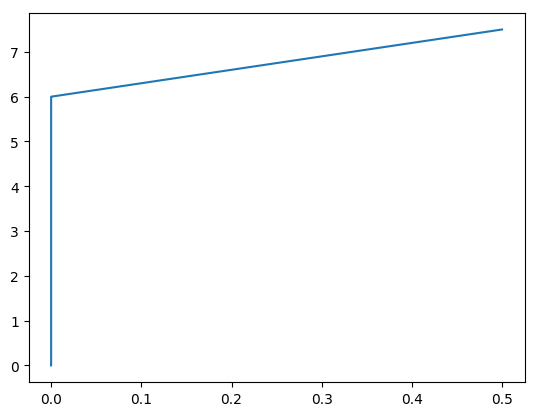

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f256cdac790>

In [46]:
plot(x,y)

In [ ]:
"""
    calcula_raices()

Esta función calcula las raices de una función `f(x)`, que debe haberse definido,
considerando distintos valores de las condiciones iniciales en el intervalo 
\$ x\\in [-20,20] \$ , y devuelve los resultados obtenidos en un vector.
"""
function calcula_raices()
    condiciones_iniciales = -20:0.125:20
    raices = similar(condiciones_iniciales)

    for (j, x_0) in enumerate(condiciones_iniciales)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        raices[j] = x
    end
    
    raices
end

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [16]:
"""
 df_simetrica()

Este algoritmo calcula la derivada simétrica de una función, es decir, para un una diferencia h 
adelante del punto \$x_0\$ y otra atras.
"""
function df_simetrica(f, x0, h)
    df=(f(x0+h)-f(x0-h))/(2.0*h)
    return df
end

df_simetrica

In [17]:
?df_simetrica()

df_simetrica()

Este algoritmo calcula la derivada simétrica de una función, es decir, para un una diferencia h  adelante del punto $x_0$ y otra atras.


In [18]:
df_derecha(x->3x^2-2,1.0,2.0^-10)

6.0029296875

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


La [derivada compleja](https://en.wikipedia.org/wiki/Complex_analysis) tiene la siguiente expresión

$$f'(z_0)=\lim_{z\rightarrow z_0}\frac{f(z)-f(z_0)}{z-z_0},\hspace{.3cm}z\in\mathbb{C}
\hspace{.3cm}\mbox{con}\hspace{.3cm}z=x+iy$$

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?